# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Number of Sets in which entire data needs to be divided
sets=13
set_id=[]
record_id=[]
#Creating list for Set and Record Id
for city_set in range(1,sets+1):
    for city_number in range(1,round(len(cities)/sets)+2):
        set_id.append(city_set)
        record_id.append(city_number)
        if len(set_id)==len(cities):
            break
#Creating Data Frame by Combining the city with set number and record number    
cities_df=pd.DataFrame({"cities":cities,"Set":set_id,"Record Id":record_id})
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
weather_json=[]
print("Beginning Data Retrieval")
print("-----------------------------")
#Itteration for each City to get details
for city_unique in cities: 
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city_unique}"
    weather_response = requests.get(query_url)
     # Add a one second interval between queries 
    time.sleep(1)
    #Checking all the sucess records
    if weather_response.json()["cod"]==200:
        weather_json.append(weather_response.json())
        city_df = cities_df.loc[cities_df["cities"] == city_unique, ["Record Id","Set"]]
        Record_Id=city_df["Record Id"].to_string(index=False)
        Set_Id=city_df["Set"].to_string(index=False)
        print(f"Processing Record {Record_Id} of set {Set_Id} | {city_unique}")
    #Checking all the Failed record
    else:
        print(f"City not found. Skipping... ")

Beginning Data Retrieval
-----------------------------
Processing Record  1 of set  1 | okhotsk
Processing Record  2 of set  1 | xining
Processing Record  3 of set  1 | aksay
Processing Record  4 of set  1 | ust-karsk
Processing Record  5 of set  1 | bluff
Processing Record  6 of set  1 | koplik
City not found. Skipping... 
Processing Record  8 of set  1 | methoni
Processing Record  9 of set  1 | cidreira
Processing Record  10 of set  1 | georgetown
Processing Record  11 of set  1 | praia da vitoria
Processing Record  12 of set  1 | ushuaia
Processing Record  13 of set  1 | yokadouma
Processing Record  14 of set  1 | lebu
Processing Record  15 of set  1 | jaguarari
Processing Record  16 of set  1 | albany
City not found. Skipping... 
Processing Record  18 of set  1 | rikitea
Processing Record  19 of set  1 | punta arenas
Processing Record  20 of set  1 | mataura
Processing Record  21 of set  1 | severo-kurilsk
Processing Record  22 of set  1 | kaitangata
City not found. Skipping... 
Pr

Processing Record  45 of set  4 | sabang
Processing Record  46 of set  4 | saint anthony
Processing Record  47 of set  4 | pecos
City not found. Skipping... 
Processing Record  49 of set  4 | okha
Processing Record  50 of set  4 | paracuru
Processing Record  1 of set  5 | ust-nera
City not found. Skipping... 
Processing Record  3 of set  5 | mubende
City not found. Skipping... 
Processing Record  5 of set  5 | bom jardim
Processing Record  6 of set  5 | ayan
Processing Record  7 of set  5 | victoria
Processing Record  8 of set  5 | iranshahr
Processing Record  9 of set  5 | kushiro
Processing Record  10 of set  5 | yarovoye
City not found. Skipping... 
Processing Record  12 of set  5 | batemans bay
Processing Record  13 of set  5 | salta
Processing Record  14 of set  5 | ambon
Processing Record  15 of set  5 | lakhdenpokhya
Processing Record  16 of set  5 | san rafael
Processing Record  17 of set  5 | gambiran
City not found. Skipping... 
Processing Record  19 of set  5 | vostok
Proces

Processing Record  44 of set  8 | meulaboh
Processing Record  45 of set  8 | napier
Processing Record  46 of set  8 | rehoboth
Processing Record  47 of set  8 | huarmey
Processing Record  48 of set  8 | cabo san lucas
Processing Record  49 of set  8 | victor harbor
Processing Record  50 of set  8 | haines junction
Processing Record  1 of set  9 | sept-iles
Processing Record  2 of set  9 | belmonte
Processing Record  3 of set  9 | remanso
Processing Record  4 of set  9 | richards bay
Processing Record  5 of set  9 | carbonia
Processing Record  6 of set  9 | maamba
City not found. Skipping... 
Processing Record  8 of set  9 | boyolangu
Processing Record  9 of set  9 | gushikawa
Processing Record  10 of set  9 | esperance
Processing Record  11 of set  9 | pangai
Processing Record  12 of set  9 | korla
Processing Record  13 of set  9 | bantou
Processing Record  14 of set  9 | banyo
Processing Record  15 of set  9 | praxedis guerrero
City not found. Skipping... 
Processing Record  17 of set

Processing Record  39 of set  12 | kamenka
Processing Record  40 of set  12 | ahipara
Processing Record  41 of set  12 | ewa beach
Processing Record  42 of set  12 | morros
City not found. Skipping... 
Processing Record  44 of set  12 | vodnyy
Processing Record  45 of set  12 | nome
Processing Record  46 of set  12 | boden
Processing Record  47 of set  12 | tadine
Processing Record  48 of set  12 | berlevag
Processing Record  49 of set  12 | petropavlovsk-kamchatskiy
Processing Record  50 of set  12 | tiarei
Processing Record  1 of set  13 | qasigiannguit
Processing Record  2 of set  13 | calama
Processing Record  3 of set  13 | qujing
Processing Record  4 of set  13 | shitanjing
Processing Record  5 of set  13 | lakatoro
Processing Record  6 of set  13 | deputatskiy
City not found. Skipping... 
Processing Record  8 of set  13 | terra santa
Processing Record  9 of set  13 | talnakh
Processing Record  10 of set  13 | sambava
Processing Record  11 of set  13 | sandakan
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Defining list for the Data extraction from Json
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lon=[]
max_temp=[]
wind_speed=[]
#For loop to create the list of all the data
for weather in weather_json:
    city_name.append(weather["name"])
    cloudiness.append(weather["clouds"]["all"])
    country.append(weather["sys"]["country"])
    date.append(weather["dt"])
    humidity.append(weather["main"]["humidity"])
    lon.append(weather["coord"]["lon"])
    lat.append(weather["coord"]["lat"])
    max_temp.append(weather["main"]["temp_max"])
    wind_speed.append(weather["wind"]["speed"])
#create data frame for all the required data 
City_Weather_df=pd.DataFrame({"City":city_name,"Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lon,"Max Temp":max_temp,"Wind Speed":wind_speed})
#saving the city data into csv
City_Weather_df.to_csv(output_data_file)
#Displaying count 
City_Weather_df.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [6]:
#Displaying Dataframe summary
City_Weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Okhotsk,100,RU,1580009194,72,59.38,143.30,-11.83,15.93
1,Xining,0,CN,1580009502,45,36.62,101.77,18.23,5.37
2,Aksay,100,RU,1580009503,80,47.26,39.87,35.60,11.18
3,Ust'-Karsk,0,RU,1580009504,78,52.70,118.81,8.02,1.79
4,Bluff,57,NZ,1580009157,52,-46.60,168.33,66.49,8.52


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

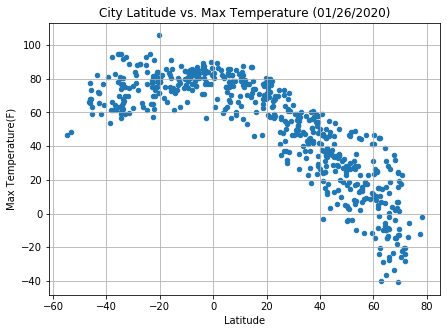

In [7]:
#Plotting Scatter Plot
date=pd.to_datetime(City_Weather_df["Date"],unit='s').dt.strftime('%m/%d/%Y')
City_Weather_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, figsize=(7,5),title=f"City Latitude vs. Max Temperature ({date[0]})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.savefig("output_data/Latitude_vs_Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

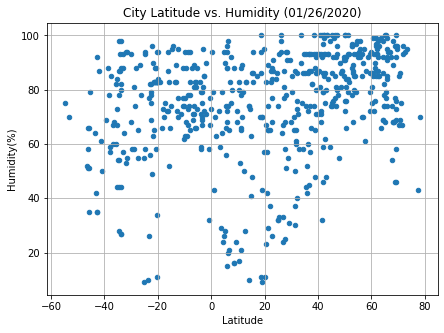

In [8]:
#Plotting Scatter Plot
City_Weather_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, figsize=(7,5),title=f"City Latitude vs. Humidity ({date[0]})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.savefig("output_data/Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

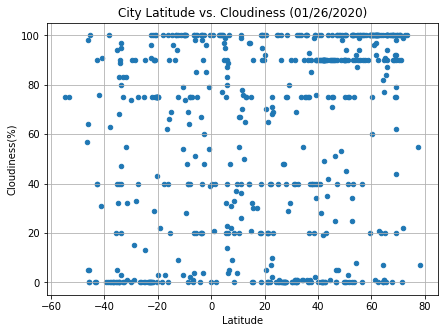

In [9]:
#Plotting Scatter Plot
City_Weather_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, figsize=(7,5),title=f"City Latitude vs. Cloudiness ({date[0]})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.savefig("output_data/Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

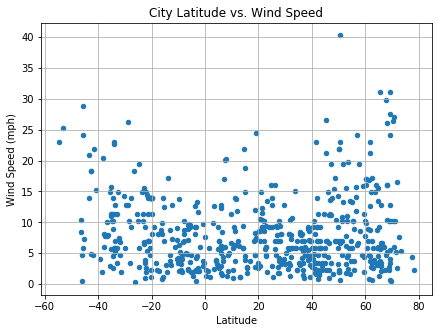

In [10]:
#Plotting Scatter Plot
City_Weather_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, figsize=(7,5),title=f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotting(data_frame,x_axis,y_axis,title_plot,y_label,x_label,eq_x,eq_y,pic_name):
    data_frame.plot(kind="scatter", x=x_axis, y=y_axis, grid=False, figsize=(7,5),title=title_plot)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data_frame[x_axis], data_frame[y_axis])
    regress_values = data_frame[x_axis] * slope + intercept
    #Line equation 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plotting the line
    plt.plot(data_frame[x_axis],regress_values,"r-")
    #Plotting the line equation
    plt.annotate(line_eq,(eq_x,eq_y),fontsize=15,color="red")
    plt.savefig(pic_name)
    print(f"rvalue is : {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df = City_Weather_df.loc[City_Weather_df["Lat"] >= 0]
Southern_df = City_Weather_df.loc[City_Weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Observation: Southern Hemisphere data is more scattered than Northern Hemisphere. rvalue is high for Northern Hemisphere. (Temeprature is Maximum when we reach to equator)

rvalue is : -0.8730360769273694


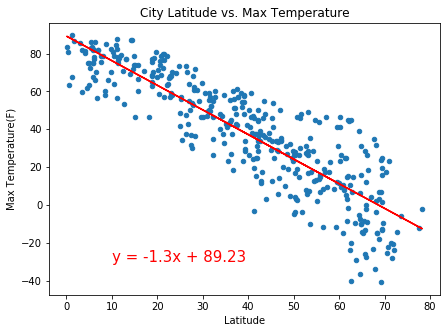

In [13]:
plotting(Northern_df,'Lat','Max Temp',"City Latitude vs. Max Temperature","Max Temperature(F)","Latitude",10,-30,"output_data/Northern_City_Lat_Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue is : 0.4280169605371912


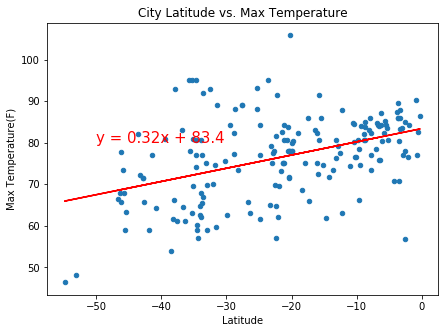

In [17]:
plotting(Southern_df,'Lat','Max Temp',"City Latitude vs. Max Temperature","Max Temperature(F)","Latitude",-50,80,"output_data/Southern_City_Lat_Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Observation: Data in both the Hemisphere almost equally scattered. rvalue is less in both the cases. In Northern Hemisphere, as we move away from equator humidity is increasing, but for southern hemisphere the Humidity is increasining as we move near to equator.

rvalue is : 0.3893785517425851


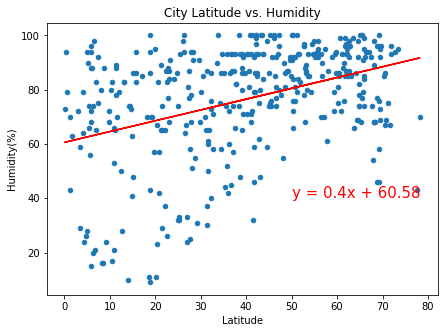

In [18]:
plotting(Northern_df,'Lat','Humidity',"City Latitude vs. Humidity","Humidity(%)","Latitude",50,40,"output_data/Northern_City_Lat_Humidity")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue is : 0.23675303589968769


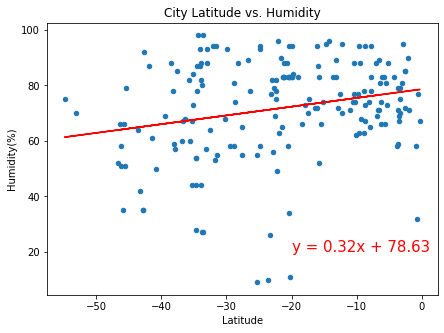

In [19]:
plotting(Southern_df,'Lat','Humidity',"City Latitude vs. Humidity","Humidity(%)","Latitude",-20,20,"output_data/Southern_City_Lat_Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Observation: Data in both the Hemisphere doesnt have cluster.  In Northern Hemisphere, as we move away from equator Cloudiness is increasing, but for southern hemisphere the Humidity is increasining as we move near to equator.

rvalue is : 0.2640499110801439


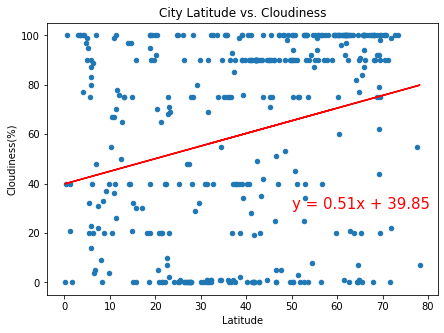

<Figure size 432x288 with 0 Axes>

In [20]:
plotting(Northern_df,'Lat','Cloudiness',"City Latitude vs. Cloudiness","Cloudiness(%)","Latitude",50,30,"output_data/Northern_City_Lat_Coludiness")
plt.savefig("tv_show_ratings.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue is : 0.23904071817853392


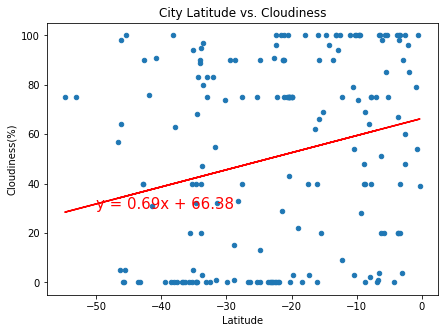

In [21]:
plotting(Southern_df,'Lat','Cloudiness',"City Latitude vs. Cloudiness","Cloudiness(%)","Latitude",-50,30,"output_data/Southern_City_Lat_Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Observation: R value is really less and Wind Speed is almost remains same throughout the both north and south hemisphere.

rvalue is : 0.1853798016253345


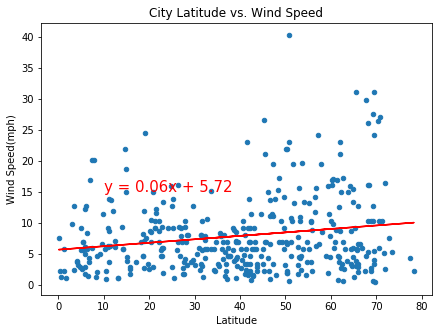

In [22]:
plotting(Northern_df,'Lat','Wind Speed',"City Latitude vs. Wind Speed","Wind Speed(mph)","Latitude",10,15,"output_data/Northern_City_Lat_Wind_Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue is : -0.41100477373048455


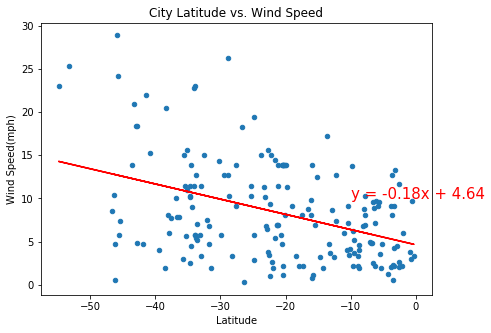

In [23]:
plotting(Southern_df,'Lat','Wind Speed',"City Latitude vs. Wind Speed","Wind Speed(mph)","Latitude",-10,10,"output_data/Southern_City_Lat_Wind_Speed")